In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import matplotlib.patches as mpatches
import matplotlib
from prettytable import PrettyTable
import warnings
import json
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

filename = 'US_Accidents_Dec21_updated.csv'
selected_features = ['ID', 'Severity',  'Start_Lng', 'Start_Lat', 'Distance(mi)', 'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Temperature(F)', 'Wind_Speed(mph)', 'Humidity(%)',
                     'Pressure(in)', 'Precipitation(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Time_Duration(min)', 'Hour', 'Weekday', 'Year']
with open('mapping_us_states.json') as json_file:
    us_states_map = json.load(json_file)


In [21]:
acc_df = pd.read_csv(f'dataset/{filename}')
acc_df.Start_Time = pd.to_datetime(acc_df.Start_Time)
acc_df.End_Time = pd.to_datetime(acc_df.End_Time)
acc_df.shape
acc_df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [22]:
acc_df['Start_Time'] = pd.to_datetime(acc_df['Start_Time'], errors='coerce')
acc_df['End_Time'] = pd.to_datetime(acc_df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
acc_df['Year'] = acc_df['Start_Time'].dt.year
acc_df['Month'] = acc_df['Start_Time'].dt.strftime('%b')
acc_df['Day'] = acc_df['Start_Time'].dt.day
acc_df['Hour'] = acc_df['Start_Time'].dt.hour
acc_df['Weekday'] = acc_df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
acc_df[td]=round((acc_df['End_Time']-acc_df['Start_Time'])/np.timedelta64(1,'m'))


In [97]:
selected_df=acc_df[selected_features].copy()
selected_df.head()

,ID,Severity,Start_Lng,Start_Lat,Distance(mi),Side,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Speed(mph),Humidity(%),Pressure(in),Precipitation(in),Visibility(mi),Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Time_Duration(min),Hour,Weekday,Year
0,A-1,3,-83.092860,40.108910,3.230,R,Dublin,Franklin,OH,43017,US/Eastern,42.1,10.4,58.0,29.76,0.00,10.0,SW,Light Rain,Night,Night,360.0,0,Mon,2016
1,A-2,2,-84.062800,39.865420,0.747,R,Dayton,Montgomery,OH,45424,US/Eastern,36.9,NaN,91.0,29.68,0.02,10.0,Calm,Light Rain,Night,Night,360.0,5,Mon,2016
2,A-3,2,-84.524680,39.102660,0.055,R,Cincinnati,Hamilton,OH,45203,US/Eastern,36.0,NaN,97.0,29.70,0.02,10.0,Calm,Overcast,Night,Night,360.0,6,Mon,2016
3,A-4,2,-81.537840,41.062130,0.123,R,Akron,Summit,OH,44311,US/Eastern,39.0,NaN,55.0,29.65,NaN,10.0,Calm,Overcast,Night,Night,360.0,6,Mon,2016
4,A-5,3,-84.492792,39.172393,0.500,R,Cincinnati,Hamilton,OH,45217,US/Eastern,37.0,10.4,93.0,29.69,0.01,10.0,WSW,Light Rain,Day,Day,360.0,7,Mon,2016


In [5]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(selected_df['City'].value_counts()).reset_index().rename(
    columns={'index': 'City', 'City': 'Cases'})
top_cities = pd.DataFrame(city_df.head(15))


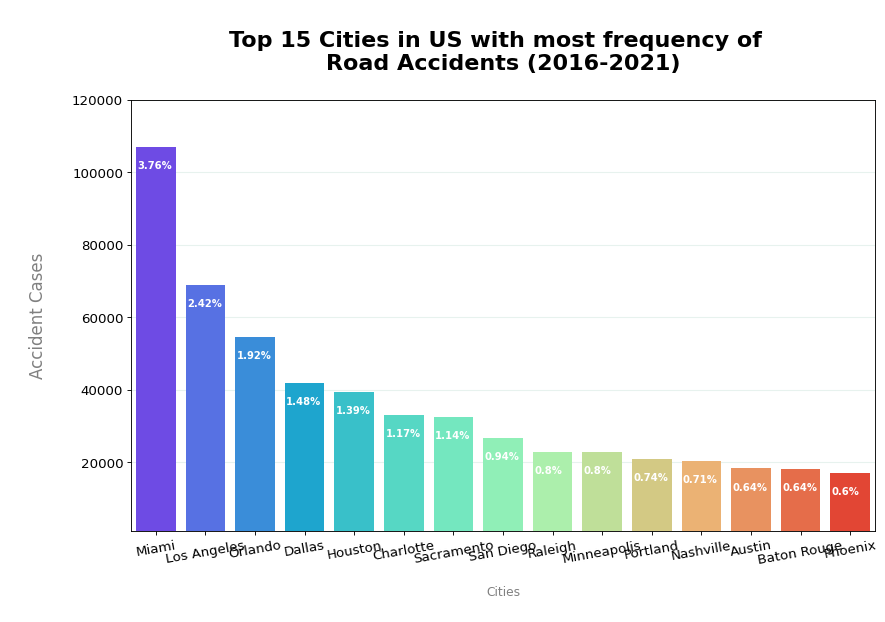

In [6]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)

ax = sns.barplot(y=top_cities['Cases'],
                 x=top_cities['City'], palette='rainbow')

total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-6000,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=9, weight='bold',
            color='white')

plt.title('\nTop 15 Cities in US with most frequency of  \nRoad Accidents (2016-2021)\n',
          size=20, color='black', weight='bold')

plt.ylim(1000, 120000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=11, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')


ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
plt.show()


In [8]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
states = gpd.read_file('us-states-map')
def convert(x): return us_states_map[x]


state_df = pd.DataFrame(selected_df['State'].value_counts()).reset_index().rename(columns={'index': 'State', 'State': 'Cases'})
state_df['State'] = state_df['State'].apply(convert)
size_state = round(len(state_df))
states_name = list(state_df['State'].head(size_state))


In [9]:
geometry = [Point(xy) for xy in zip(
    selected_df['Start_Lng'], selected_df['Start_Lat'])]
geo_df = gpd.GeoDataFrame(selected_df, geometry=geometry)

geo_df['State'] = geo_df['State'].apply(convert)


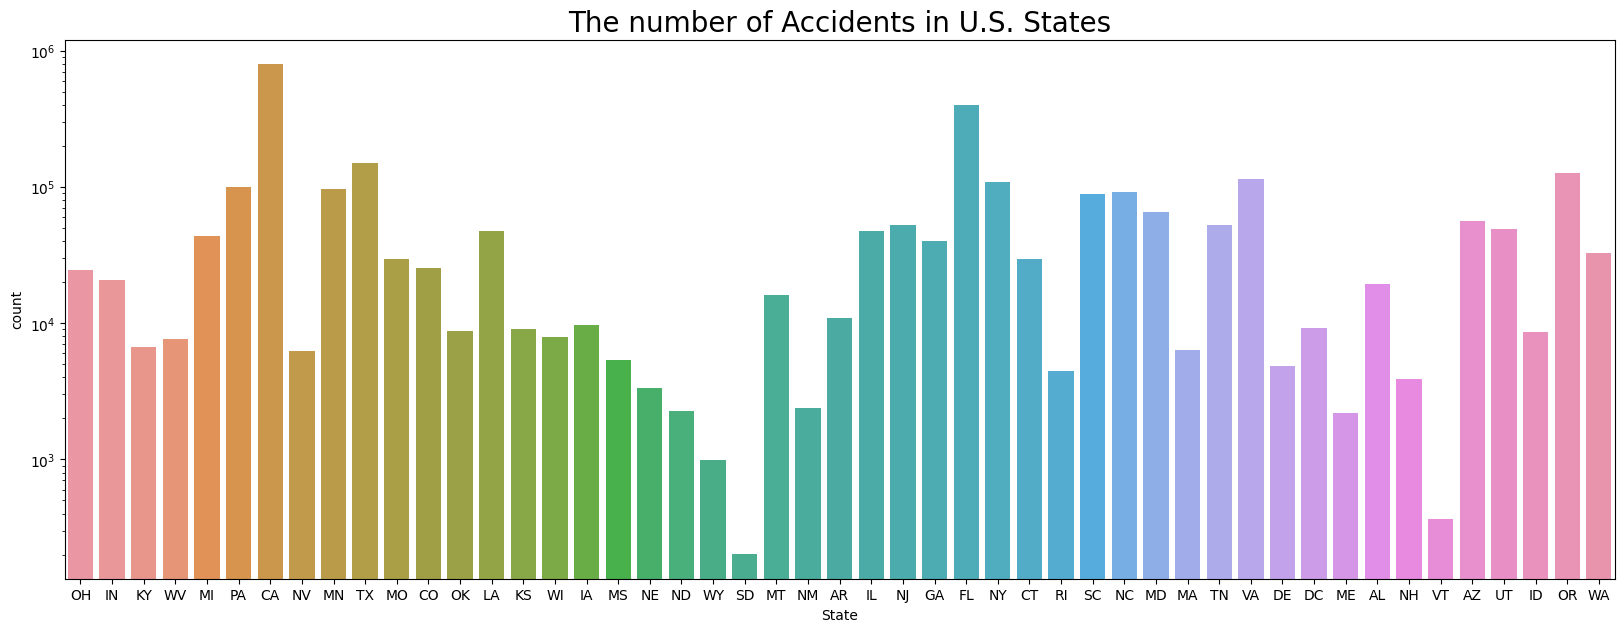

In [12]:
plt.figure(figsize=(20, 7))
sns.countplot(x="State", data=selected_df)
plt.yscale("log")
plt.title("The number of Accidents in U.S. States", fontsize=20)
plt.show()


Text(0.5, 1.0, '\nVisualization distribution of Accidents in US (2016-2021)')

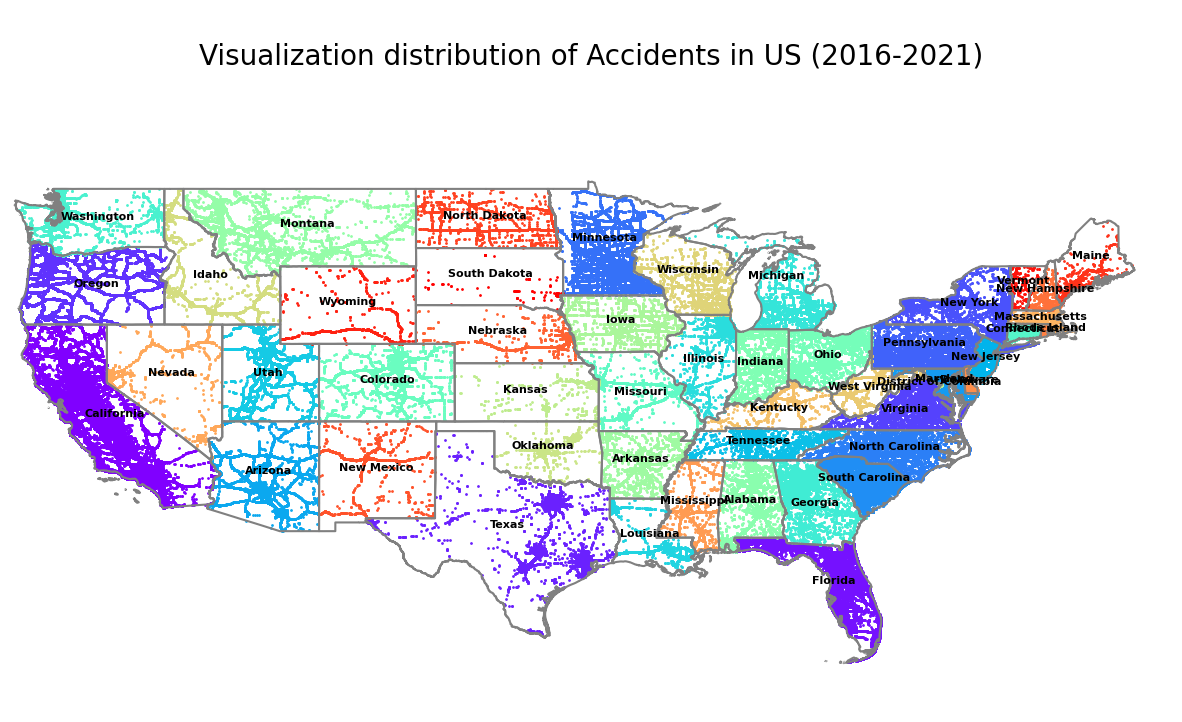

In [124]:
fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.set_xlim([-125, -65])
ax1.set_ylim([22, 55])

states.boundary.plot(ax=ax1, color='grey')
states.apply(lambda x: None if (x.NAME not in states_name) else ax1.annotate(
    text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', weight='bold', color='black', fontsize=8), axis=1)

light_color_pools = ['#FF5252', '#9575CD', '#FF8A80', '#FF4081', '#FFEE58', '#7C4DFF', '#00E5FF', '#81D4FA', '#64FFDA', '#8C9EFF']
clrs = []
for i in range(0, size_state):
    clrs.append(light_color_pools[i % len(light_color_pools)])
# clr = ['#FF5252', '#9575CD', '#FF8A80', '#FF4081', '#FFEE58', '#7C4DFF', '#00E5FF', '#81D4FA', '#64FFDA', '#8C9EFF',
#         '#FF5252', '#9575CD', '#FF8A80', '#FF4081', '#FFEE58', '#7C4DFF', '#00E5FF', '#81D4FA', '#64FFDA', '#8C9EFF']
# cmap = cm.get_cmap('gnuplot2', size_state)
# clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
cmap = cm.get_cmap('rainbow', size_state)
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

count = 0
for i in list(state_df['State'].head(size_state)):
    geo_df[geo_df['State'] == i].plot(
        ax=ax1, markersize=1, color=clrs[count], marker='o')
    count += 1

for i in ['bottom', 'top', 'left', 'right']:
    side = ax1.spines[i]
    side.set_visible(False)

plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nVisualization distribution of Accidents in US (2016-2021)',
          size=20, color='black')


Severity Analysis

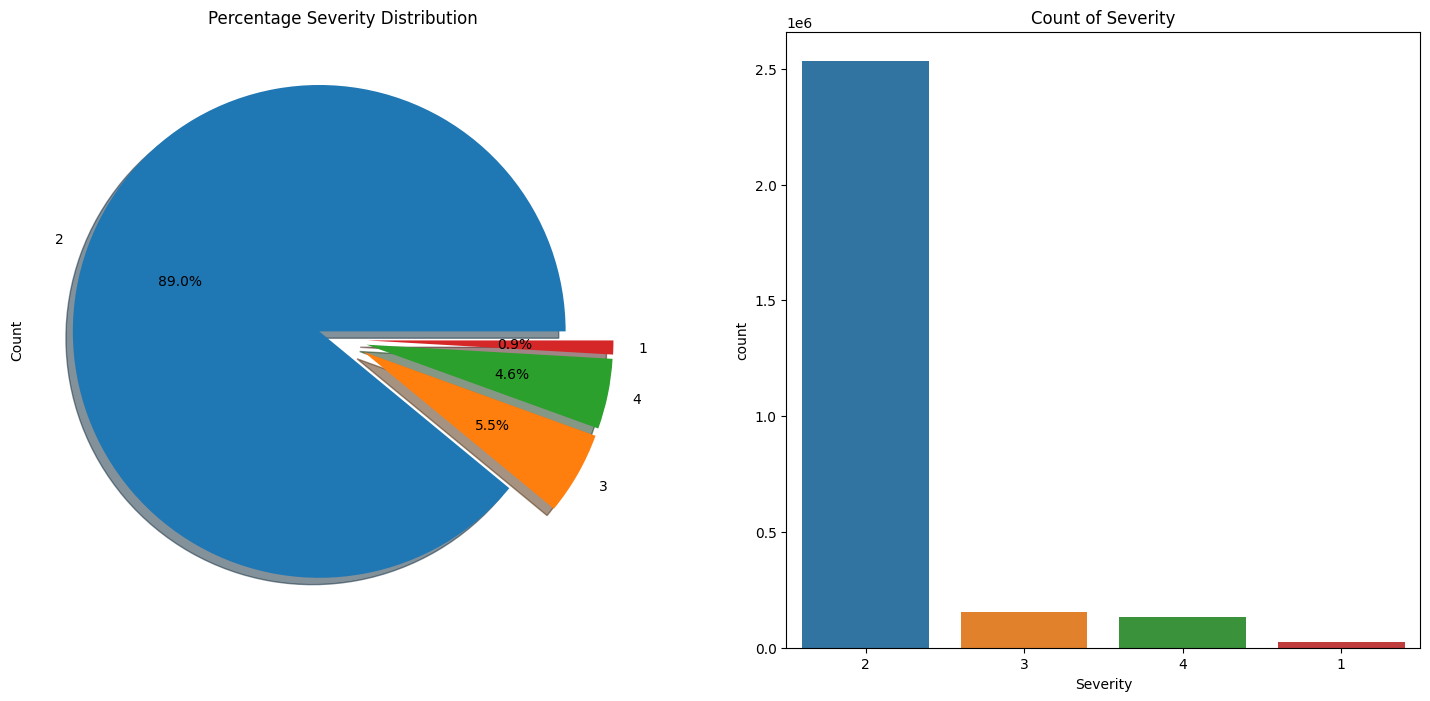

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
selected_df['Severity'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot(data=selected_df, ax=ax[1], x='Severity',
              order=selected_df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()


Text(0.5, 1.0, 'Severity of Accidents by Year')

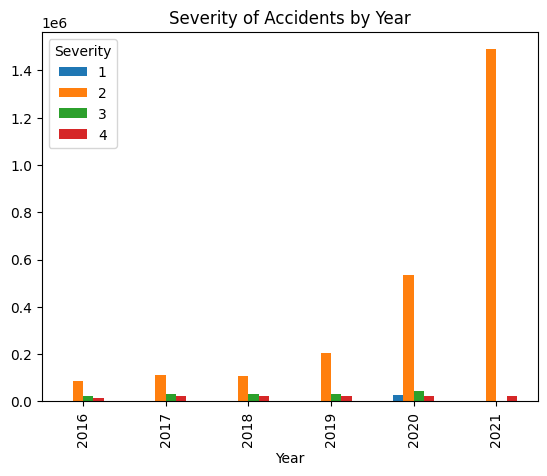

In [25]:
pd.crosstab(selected_df["Year"],selected_df["Severity"]).plot(kind="bar")
plt.title("Severity of Accidents by Year")

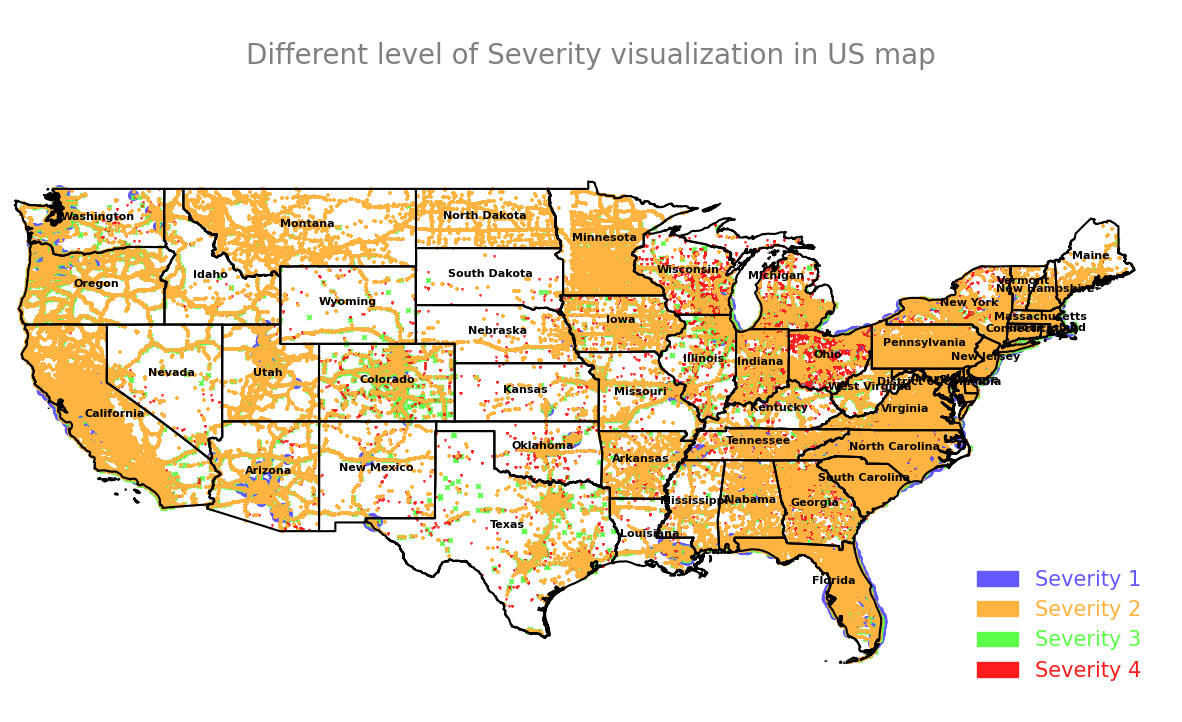

In [126]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim([-125, -65])
ax.set_ylim([22, 55])
states.boundary.plot(ax=ax, color='black')
states.apply(lambda x: None if (x.NAME not in states_name) else ax.annotate(
    text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', weight='bold', color='black', fontsize=8), axis=1)
severity_color = ['#6459ff', '#ffb340', '#5cff4a','#ff1c1c']
geo_df[geo_df['Severity'] == 1].plot(
    ax=ax, markersize=50, color=severity_color[0], marker='o', label='Severity 1')
geo_df[geo_df['Severity'] == 3].plot(
    ax=ax, markersize=10, color=severity_color[2], marker='x', label='Severity 3')
geo_df[geo_df['Severity'] == 4].plot(
    ax=ax, markersize=1, color=severity_color[3], marker='v', label='Severity 4')
geo_df[geo_df['Severity'] == 2].plot(
    ax=ax, markersize=5, color=severity_color[1], marker='+', label='Severity 2')


for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nDifferent level of Severity visualization in US map',
          size=20, color='grey')

One = mpatches.Patch(color=severity_color[0], label='Severity 1')
Two = mpatches.Patch(color=severity_color[1], label='Severity 2')
Three = mpatches.Patch(color=severity_color[2], label='Severity 3')
Four = mpatches.Patch(color=severity_color[3], label='Severity 4')

ax.legend(handles=[One, Two, Three, Four], prop={'size': 15}, loc='lower right', borderpad=1,
          labelcolor=severity_color, edgecolor='white')


Weather

In [118]:
def generate_intervals_labels(df, attribute, split, gap):
    var_min = min(df[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):

        lower_limit = int(var_min+((i-1)*gap))

        if i == split:
            upper_limit = int(max(df[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))

        # intervals
        intervals.append(upper_limit)

        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels
def Feature_Bin_Plot(df, attribute, clrs, intervals, labels, fig_size, font_size, y_lim, adjust, title):
    
    new_df = df.copy()
    xlabel = '{} Group'.format(attribute)
    new_df[xlabel] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')
    
    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1
                                                                                               
    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)
    
#     clrs = ['mediumspringgreen' if (x < max(temp_df['Cases'])) else 'grey' for x in temp_df['Cases']]
    cmap = cm.get_cmap(clrs, len(intervals))   
    clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    
    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs)
    plt.ticklabel_format(style='plain', axis='y')
    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')
        
    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)
    
    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)
        
    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')
    
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)

In [99]:
w_df = selected_df.copy()
w_df.head()


,ID,Severity,Start_Lng,Start_Lat,Distance(mi),Side,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Speed(mph),Humidity(%),Pressure(in),Precipitation(in),Visibility(mi),Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Time_Duration(min),Hour,Weekday,Year
0,A-1,3,-83.092860,40.108910,3.230,R,Dublin,Franklin,OH,43017,US/Eastern,42.1,10.4,58.0,29.76,0.00,10.0,SW,Light Rain,Night,Night,360.0,0,Mon,2016
1,A-2,2,-84.062800,39.865420,0.747,R,Dayton,Montgomery,OH,45424,US/Eastern,36.9,NaN,91.0,29.68,0.02,10.0,Calm,Light Rain,Night,Night,360.0,5,Mon,2016
2,A-3,2,-84.524680,39.102660,0.055,R,Cincinnati,Hamilton,OH,45203,US/Eastern,36.0,NaN,97.0,29.70,0.02,10.0,Calm,Overcast,Night,Night,360.0,6,Mon,2016
3,A-4,2,-81.537840,41.062130,0.123,R,Akron,Summit,OH,44311,US/Eastern,39.0,NaN,55.0,29.65,NaN,10.0,Calm,Overcast,Night,Night,360.0,6,Mon,2016
4,A-5,3,-84.492792,39.172393,0.500,R,Cincinnati,Hamilton,OH,45217,US/Eastern,37.0,10.4,93.0,29.69,0.01,10.0,WSW,Light Rain,Day,Day,360.0,7,Mon,2016


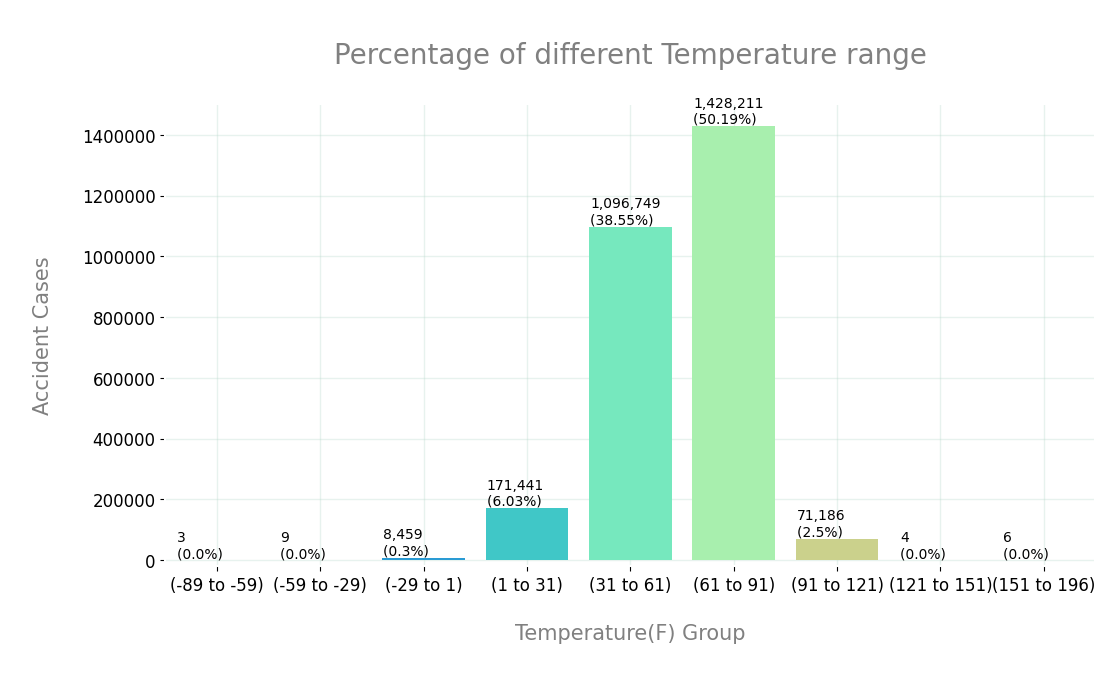

In [119]:
temp_intervals, temp_labels = generate_intervals_labels(
    w_df, 'Temperature(F)', 9, 30)

Feature_Bin_Plot(w_df, 'Temperature(F)', 'rainbow', temp_intervals, temp_labels,
                 (12, 6), 10, (-20000, 1500000), [0.01, 10000], '\nPercentage of different Temperature range\n')


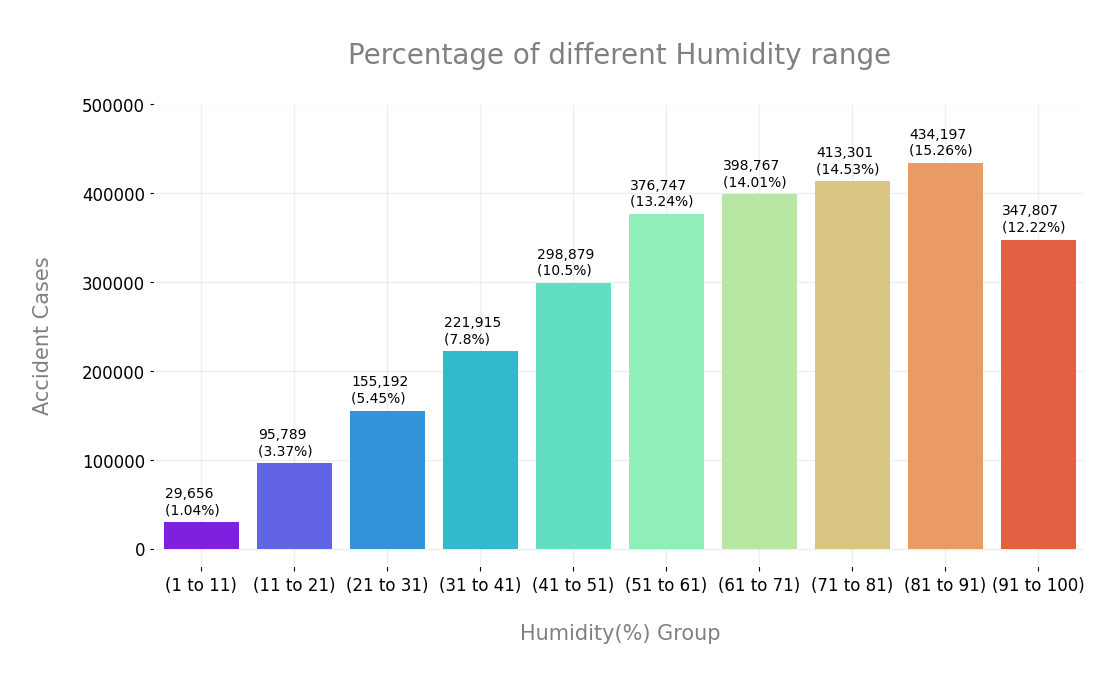

In [120]:
Humidity_intervals, Humidity_labels = generate_intervals_labels(w_df, 'Humidity(%)', 10, 10)

Feature_Bin_Plot(w_df, 'Humidity(%)', 'rainbow', Humidity_intervals, Humidity_labels,
                 (12, 6), 10, (-20000, 500000), [0.01, 10000], '\nPercentage of different Humidity range\n')


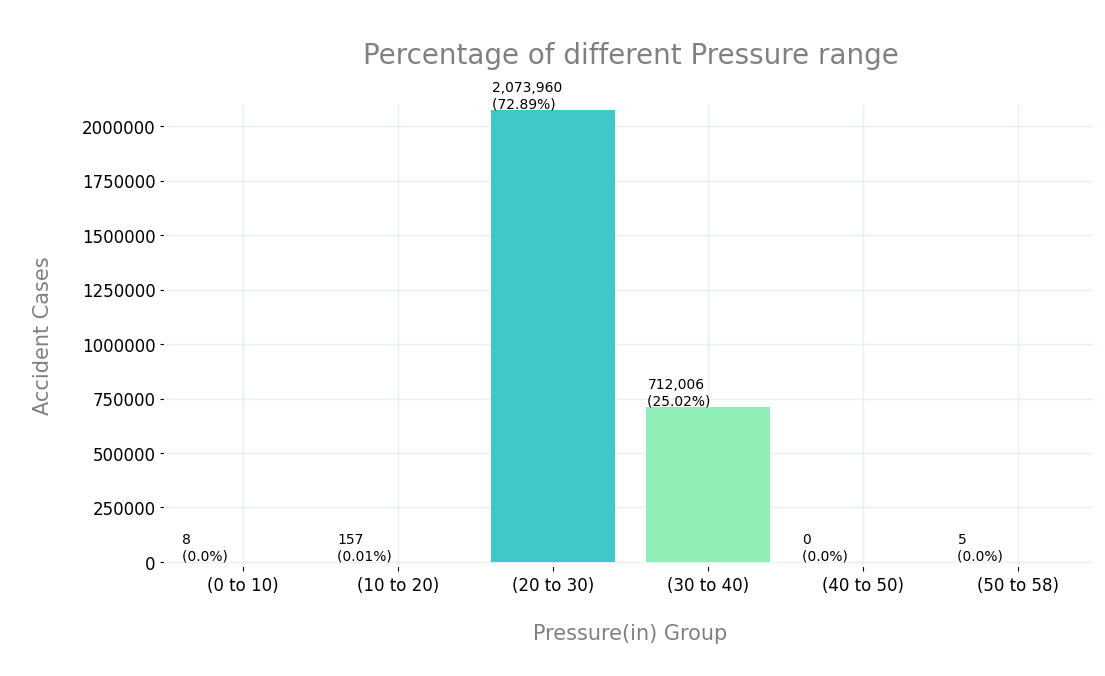

In [121]:
Pressure_intervals, Pressure_labels = generate_intervals_labels(w_df, 'Pressure(in)', 6, 10)

Feature_Bin_Plot(w_df, 'Pressure(in)', 'rainbow', Pressure_intervals, Pressure_labels,
                 (12, 6), 10, (-20000, 2100000), [0.01, 10000], '\nPercentage of different Pressure range\n')


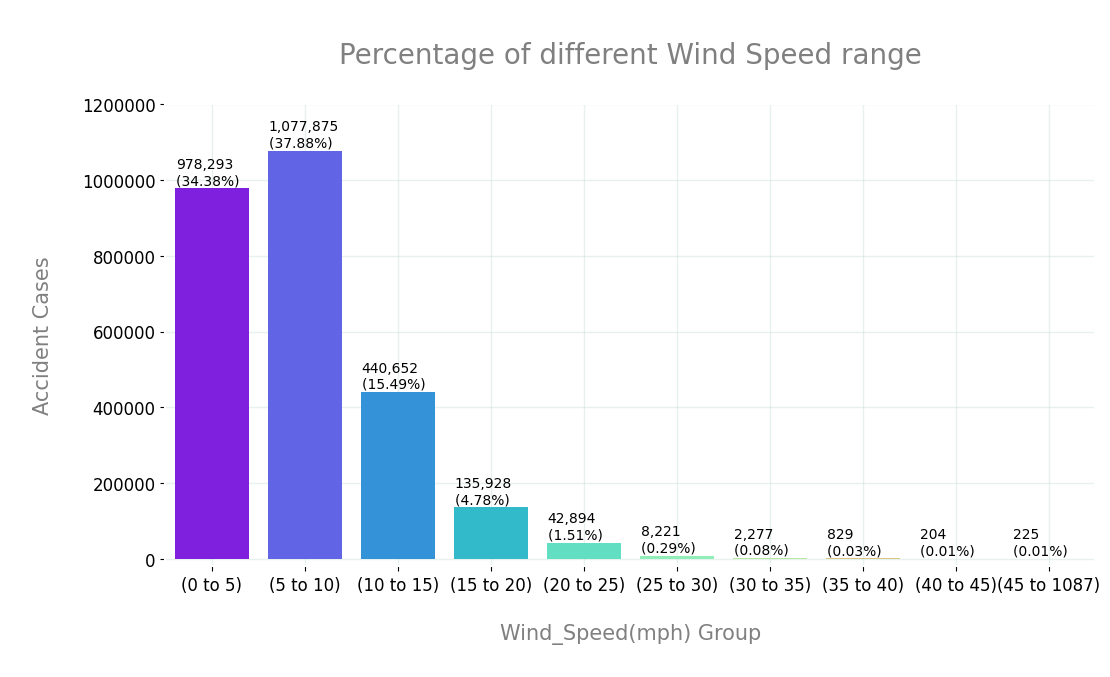

In [122]:
Wind_Speed_intervals, Wind_Speed_labels = generate_intervals_labels(w_df, 'Wind_Speed(mph)', 10, 5)

Feature_Bin_Plot(w_df, 'Wind_Speed(mph)', 'rainbow', Wind_Speed_intervals, Wind_Speed_labels,
                 (12, 6), 10, (-20000, 1200000), [0.01, 10000], '\nPercentage of different Wind Speed range\n')


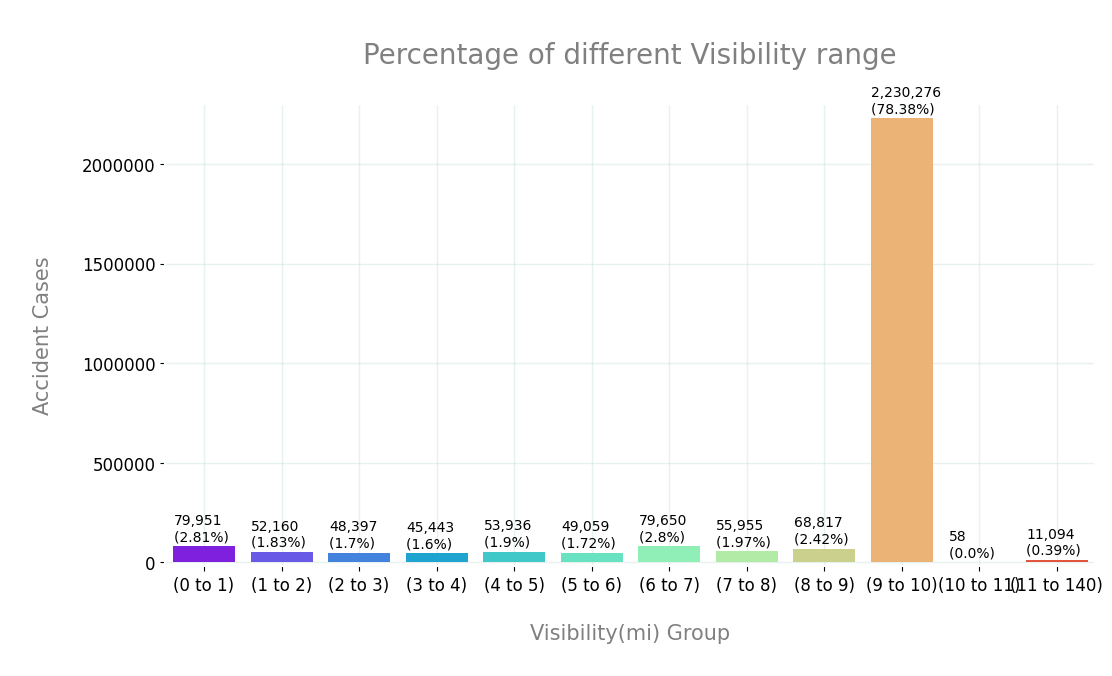

In [123]:
Visibility_intervals, Visibility_labels = generate_intervals_labels(w_df,'Visibility(mi)', 12, 1)

Feature_Bin_Plot(w_df, 'Visibility(mi)', 'rainbow', Visibility_intervals, Visibility_labels,
                 (12, 6), 10, (-20000, 2300000), [0.01, 30000], '\nPercentage of different Visibility range\n')


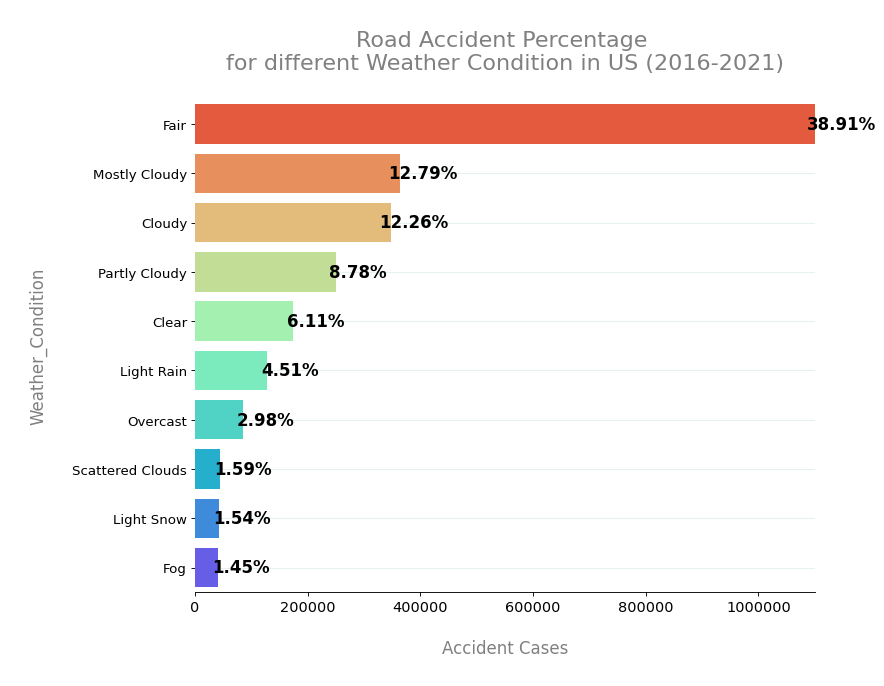

In [111]:
weather_condition_df = pd.DataFrame(w_df.Weather_Condition.value_counts().head(
    10)).reset_index().rename(columns={'index': 'Weather_Condition', 'Weather_Condition': 'Cases'})
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)

cmap = cm.get_cmap('rainbow_r', 10)
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
ax.ticklabel_format(style='plain')
ax = sns.barplot(x=weather_condition_df['Cases'],
                 y=weather_condition_df['Weather_Condition'], palette='rainbow_r')

total = w_df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()+40000, p.get_y()+0.4,
             '{:.2f}%'.format(p.get_width()*100/total), ha='center', va='center', fontsize=15, color='black', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2021)\n',
          size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nWeather_Condition\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0,1100000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 1100000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

